In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

    Number  DrawCount
33       0          3
20       1          3
42       2          3
7        3          2
69       4          4


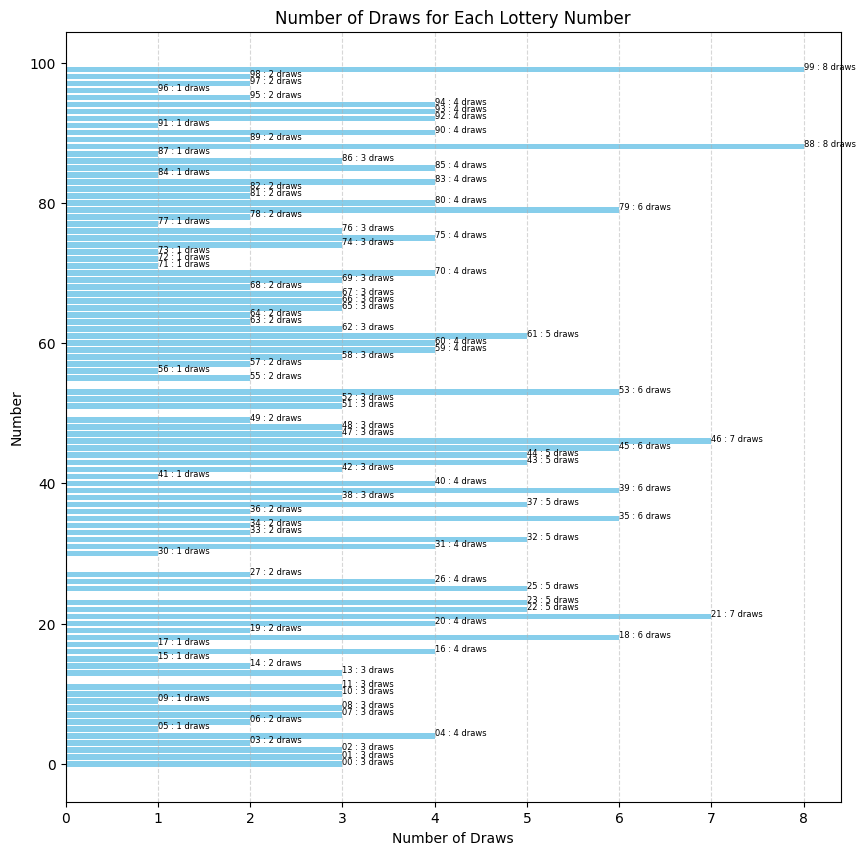

In [10]:
# ---
# Group No. 2
# 1. จิรกานต์  แก้วภิรมภ์    6410450389
# 2. ธนัตถ์     แซ่ฉั่ว         6410450478
# 3. อาทิตยา เกตเลขวัตร  6410451938
# ---

group = 2
problem = 7 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".txt"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"_output_"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"_plot_"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---
# เปิดไฟล์และอ่านข้อมูลแต่ละบรรทัดไว้ใน lines
with open(data_path, 'r') as file:
    lines = file.readlines()

# สร้างรายการของคู่ (Number, DrawCount)
numbers = {}
for i in range(0, len(lines), 2):
    date_str = lines[i].strip()
    number = int(lines[i + 1].strip())

    if number not in numbers:
        numbers[number] = 0

    numbers[number] += 1

# สร้าง DataFrame
df = pd.DataFrame(numbers.items(), columns=['Number', 'DrawCount'])

# เรียงลำดับตาม 'Number'
df = df.sort_values(by='Number')

# สร้างแผนภูมิแท่งแนวนอน
plt.figure(figsize=(10, 10))
plt.barh(df['Number'], df['DrawCount'], color='skyblue')
# หาค่า 'DrawCount' สูงสุด
max_draw_count = df['DrawCount'].max()
# กำหนดความยาวและการแบ่งช่วงแกน X
plt.xticks(range(0, max_draw_count+1,1))
plt.xlabel('Number of Draws')
plt.ylabel('Number')
plt.title('Number of Draws for Each Lottery Number')
plt.grid(True, axis='x',alpha=0.5,linestyle='--')
# กำกับข้อมูลบนแผนภูมิ
for index, row in df.iterrows():
    label = f"{str(row['Number']).zfill(2)} : {row['DrawCount']} draws"
    plt.text(row['DrawCount'], row['Number'], label, ha='left', fontsize=6)

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
df.to_csv(result_path, index=False)

# แสดงผลลัพธ์
print(df.head())

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()